<h3>Part 1 -- Autoencoder </h3>
<h5>Each cifar image is 32 X 32 X 3. This will be compressed to 8 X 8 X 8 using an autoencoder (3072 variables to 512 variables).</h5>

In [8]:
!pip install opencv-python


Instructions for updating:
non-resource variables are not supported in the long term
Number of train photos:  860
Number of test photos:  282


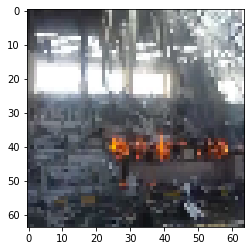

In [1]:
from keras.datasets import cifar100
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential, load_model
import os
import copy
import matplotlib.pyplot as plt
import numpy as np
from autoencoder_utils import *
import math
import cv2

import matplotlib.pyplot as plt



pathTrain='C:\\Users\\HAMROUA\\Desktop\\BackupDesktop\\Desktop\\Autoencoder-image-similarity-master\\dataset\\train\\';
all_images = []
subjects = os.listdir(pathTrain)
numberOfSubject = len(subjects)
print('Number of train photos: ', numberOfSubject)
for number1 in range(0, numberOfSubject):  # numberOfSubject
    path3 = pathTrain + subjects[number1]
    img = cv2.imread(path3 , 1)
    img = cv2.resize(img,(64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    all_images.append(img)
x_train = np.array(all_images)



pathTest='C:\\Users\\HAMROUA\\Desktop\\BackupDesktop\\Desktop\\Autoencoder-image-similarity-master\\dataset\\test\\';
all_images = []
subjects = os.listdir(pathTest)
numberOfSubject = len(subjects)
print('Number of test photos: ', numberOfSubject)
for number1 in range(0, numberOfSubject):  # numberOfSubject
    path3 = pathTest + subjects[number1]
    img = cv2.imread(path3 , 1)
    img = cv2.resize(img,(64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    all_images.append(img)
x_test = np.array(all_images)



X_train = np.reshape(x_train, (len(x_train), 64, 64, 3)) / 255.
X_test = np.reshape(x_test, (len(x_test), 64, 64, 3)) / 255.

In [2]:
autoencoder = Sequential()

input_shape = (64, 64, 3)
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=input_shape))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(MaxPooling2D((2, 2)))
autoencoder.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(MaxPooling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))

autoencoder.add(Conv2D(8, (3, 3), activation='sigmoid', padding='same', name='encoded_layer'))
#at this point, 'encoded' is (8, 8, 8)

autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_crossentropy'])

In [3]:
epochs = 100
batch_size = 64
training_batch_size = 1000
number_training_batch_per_epoch = math.ceil(X_train.shape[0] / training_batch_size)

#not the most ideal way of iterating through a dataset
for epoch in range(epochs):
    print('epoch: {}'.format(epoch))
    np.random.shuffle(X_train)
    np.random.shuffle(X_test)
    for batchnum in range(number_training_batch_per_epoch):
        X_train_batch = X_train[batchnum*training_batch_size : (batchnum+1)*training_batch_size]
        autoencoder.fit(X_train_batch, X_train_batch,
                        epochs=1,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(X_test[0:200], X_test[0:200]))


epoch: 0
Train on 860 samples, validate on 200 samples
860/860 [==============================] - ETA: 0s - loss: 0.6009 - binary_crossentropy: 0.6009

C:\Users\HAMROUA\Anaconda3\envs\deeplearning\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


860/860 [==============================] - 37s 43ms/sample - loss: 0.6009 - binary_crossentropy: 0.6009 - val_loss: 0.5758 - val_binary_crossentropy: 0.5758
epoch: 1
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 34s 39ms/sample - loss: 0.5315 - binary_crossentropy: 0.5315 - val_loss: 0.5345 - val_binary_crossentropy: 0.5345
epoch: 2
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 33s 39ms/sample - loss: 0.5065 - binary_crossentropy: 0.5065 - val_loss: 0.5260 - val_binary_crossentropy: 0.5260
epoch: 3
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 34s 39ms/sample - loss: 0.4931 - binary_crossentropy: 0.4931 - val_loss: 0.4913 - val_binary_crossentropy: 0.4913
epoch: 4
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 33s 39ms/sample - loss: 0.4823 - binary_crossentropy: 0.4823 - val_loss: 0.5000 - val_binary_crossentropy: 0.

epoch: 39
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 35s 41ms/sample - loss: 0.4473 - binary_crossentropy: 0.4473 - val_loss: 0.4719 - val_binary_crossentropy: 0.4719
epoch: 40
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 35s 41ms/sample - loss: 0.4486 - binary_crossentropy: 0.4486 - val_loss: 0.4521 - val_binary_crossentropy: 0.4521
epoch: 41
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 35s 41ms/sample - loss: 0.4520 - binary_crossentropy: 0.4520 - val_loss: 0.4705 - val_binary_crossentropy: 0.4705
epoch: 42
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 34s 40ms/sample - loss: 0.4487 - binary_crossentropy: 0.4487 - val_loss: 0.4623 - val_binary_crossentropy: 0.4623
epoch: 43
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 34s 40ms/sample - loss: 0.4468 - binary_crossentr

860/860 [==============================] - 34s 39ms/sample - loss: 0.4433 - binary_crossentropy: 0.4433 - val_loss: 0.4599 - val_binary_crossentropy: 0.4599
epoch: 78
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 34s 39ms/sample - loss: 0.4436 - binary_crossentropy: 0.4436 - val_loss: 0.4660 - val_binary_crossentropy: 0.4660
epoch: 79
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 34s 40ms/sample - loss: 0.4456 - binary_crossentropy: 0.4456 - val_loss: 0.4749 - val_binary_crossentropy: 0.4749
epoch: 80
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 34s 39ms/sample - loss: 0.4451 - binary_crossentropy: 0.4451 - val_loss: 0.4559 - val_binary_crossentropy: 0.4559
epoch: 81
Train on 860 samples, validate on 200 samples
860/860 [==============================] - 34s 39ms/sample - loss: 0.4445 - binary_crossentropy: 0.4445 - val_loss: 0.4621 - val_binary_crossentropy

In [4]:
#import h5py

#autoencoder.save('autoencoder_ISCAS.h5')
#autoencoder = load_model('autoencoder_MWSCAS.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<h5>
The code below displays the original and autoencoded versions of 10 images.
<br>
In most cases, the original object can be discerned from the autoencoded version of the image.
</h5>

In [11]:
X_test_to_show[0]

array([[[0.19215686, 0.34117647, 0.59607843],
        [0.19215686, 0.34117647, 0.59607843],
        [0.19215686, 0.34117647, 0.59607843],
        ...,
        [1.        , 0.62352941, 0.35294118],
        [0.94901961, 0.45882353, 0.25882353],
        [0.76862745, 0.36470588, 0.29019608]],

       [[0.20392157, 0.35294118, 0.60784314],
        [0.20392157, 0.35294118, 0.60784314],
        [0.20392157, 0.35294118, 0.60784314],
        ...,
        [0.98823529, 0.62745098, 0.33333333],
        [0.99215686, 0.52941176, 0.30196078],
        [0.83529412, 0.36470588, 0.21568627]],

       [[0.20392157, 0.35294118, 0.60784314],
        [0.21568627, 0.36470588, 0.61960784],
        [0.21568627, 0.36470588, 0.61960784],
        ...,
        [0.99215686, 0.65490196, 0.33333333],
        [0.98823529, 0.55294118, 0.30196078],
        [0.87058824, 0.41960784, 0.25490196]],

       ...,

       [[0.30196078, 0.00392157, 0.00392157],
        [0.26666667, 0.01568627, 0.        ],
        [0.21960784, 0

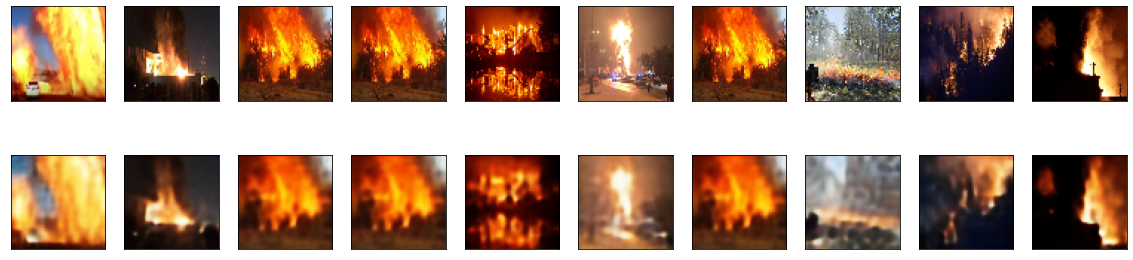

In [4]:
n = 10
img_to_show_idx = np.random.choice(range(X_test.shape[0]), n, replace=False)
X_test_to_show = X_test[img_to_show_idx]
aft_autoencode = autoencoder.predict(X_test_to_show)

fig = plt.figure(figsize=(n*2, 5))
plt.gray()
img_shape = (64, 64, 3)

for i in range(n):
    #display original
    display_single_subplot(X_test_to_show[i].reshape(img_shape), n_row=2, n_col=n, cell_num=i+1)
    #display aft autoencoding
    display_single_subplot(aft_autoencode[i].reshape(img_shape), n_row=2, n_col=n, cell_num=n+i+1)

plt.show()

<h3>
Part 2 -- selecting similar images
</h3>
<h5>
Given an image, select the most similar and dissimilar images, using binary cross entropy to determine similarity
</h5>

In [5]:
#find images similar to the image at this index
img_to_find_idx = 111

layer_name = 'encoded_layer'
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(layer_name).output)

similarity_sorted = get_sorted_similarity_idx(encoder, img_to_find_idx, dataset=X_test, loss='binary_crossentropy')


<h5>
In most cases, images with a similar color / shape are deemed to be similar.
<br><br>
Images containing the same type of object aren't deemed to be similar, since the comparison function doesn't take object type into account.
</h5>

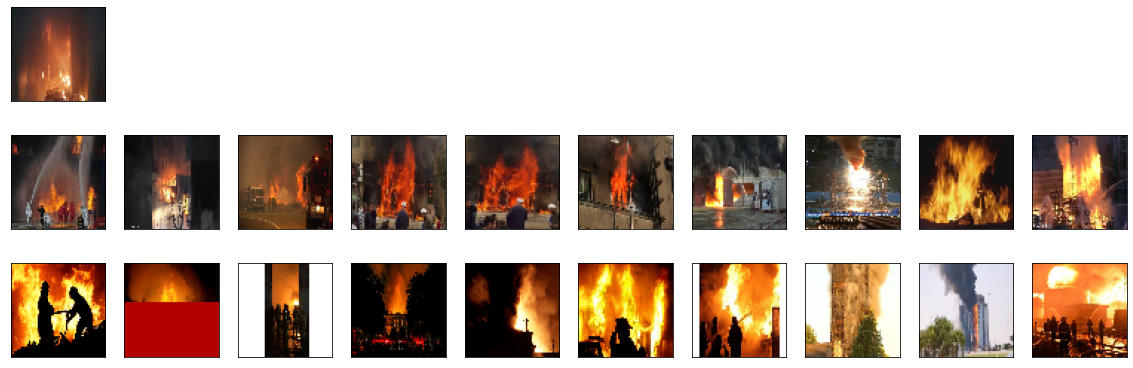

In [6]:
#show original image, n most similar images, n most dissimilar images
n = 10
image_dataset = X_test

plt.figure(figsize=(n*2, n/1.5))
img_shape = (64, 64, 3)

#display original
display_single_subplot(image_dataset[img_to_find_idx].reshape(img_shape), n_row=3, n_col=n, cell_num=1)

# #display most similar
for i in range(n):
    similar_idx = similarity_sorted[i]
    display_single_subplot(image_dataset[similar_idx].reshape(img_shape), n_row=3, n_col=n, cell_num=n+i+1)

# #display most dissimilar
for i in range(n):
    dissimilar_idx = similarity_sorted[-i-1]
    display_single_subplot(image_dataset[dissimilar_idx].reshape(img_shape), n_row=3, n_col=n, cell_num=2*n+i+1)

plt.show()

<h5>Compare to 'baseline', binary cross entropy comparison of original image pixels.</h5>

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from keras.losses import binary_crossentropy
from tensorflow.keras.losses import cosine_similarity 
import copy


img_to_find_idx = 111
dataset = copy.deepcopy(X_test)
dataset = dataset.reshape(dataset.shape[0], -1)
#initializing vars to pass into tensorflow
X_selected = [dataset[img_to_find_idx].tolist() for _ in range(dataset.shape[0])]
X_all = dataset.tolist()

X_selected_tf = tf.Variable(X_selected, tf.float32)
X_all_tf = tf.Variable(X_all, tf.float32)
loss_tf = binary_crossentropy(X_selected_tf, X_all_tf)
init_op = tf.global_variables_initializer()

similarity = []
with tf.Session() as sess:
    sess.run(init_op)
    similarity = sess.run(loss_tf)
similarity_sorted = np.argsort(np.array(similarity))[1:] #the same figure appears in X_all too, so remove it

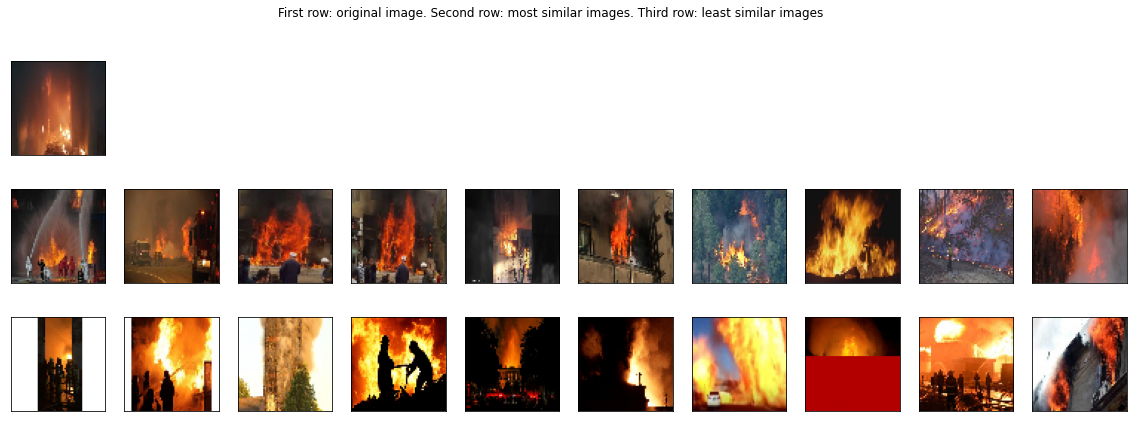

In [8]:
n=10
fig = plt.figure(figsize=(n*2, n/1.5))
plt.gray()
fig.suptitle('First row: original image. Second row: most similar images. Third row: least similar images')

img_shape = (64, 64, 3)

#display original
display_single_subplot(X_test[img_to_find_idx].reshape(img_shape), n_row=3, n_col=n, cell_num=1)
#display most similar
for i in range(n):
    similar_idx = similarity_sorted[i]
    display_single_subplot(X_test[similar_idx].reshape(img_shape), n_row=3, n_col=n, cell_num=n+i+1)
    
#display most dissimilar
for i in range(n):
    dissimilar_idx = similarity_sorted[-i-1]
    display_single_subplot(X_test[dissimilar_idx].reshape(img_shape), n_row=3, n_col=n, cell_num=2*n+i+1)

plt.show()

C:\Users\HAMROUA\Anaconda3\envs\deeplearning\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(282, 16, 16, 8)
Class  0


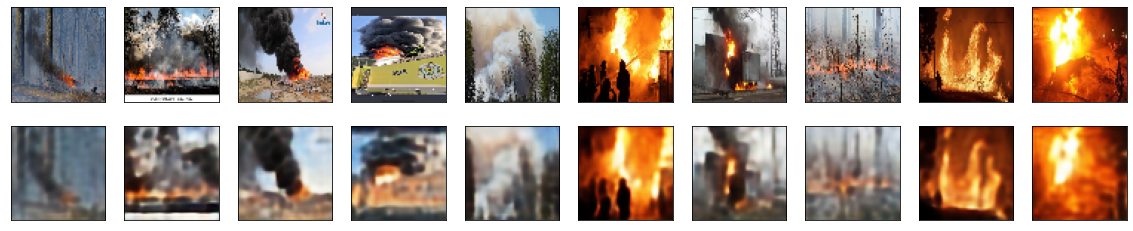

Class  1


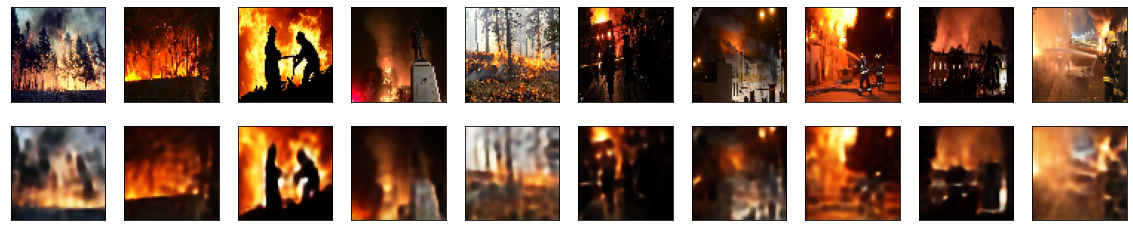

Class  2


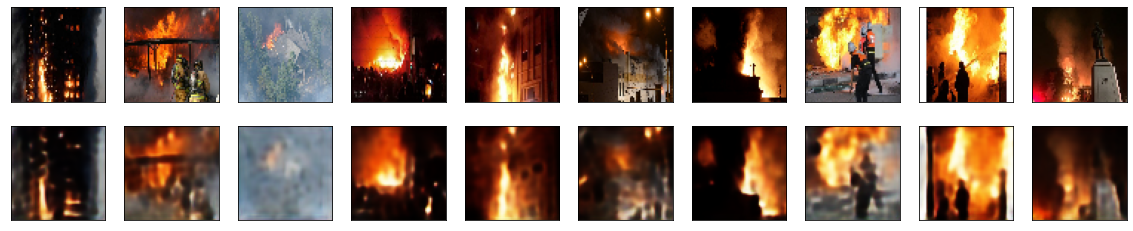

Class  3


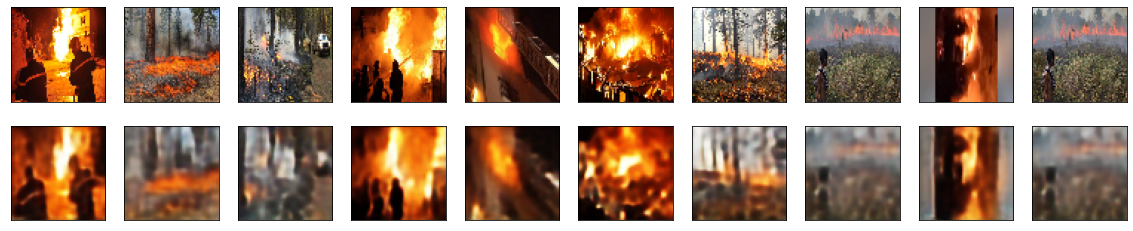

Class  4


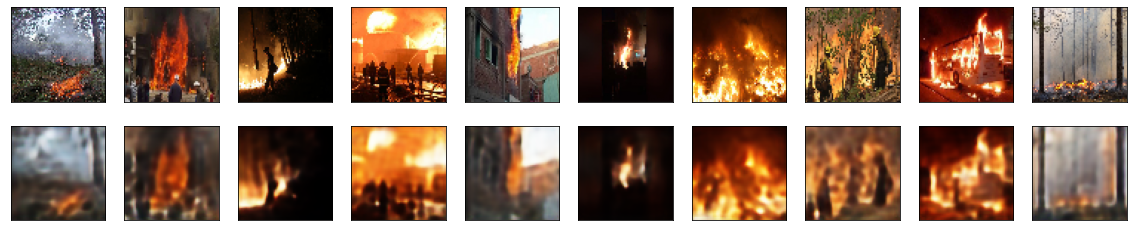

Class  5


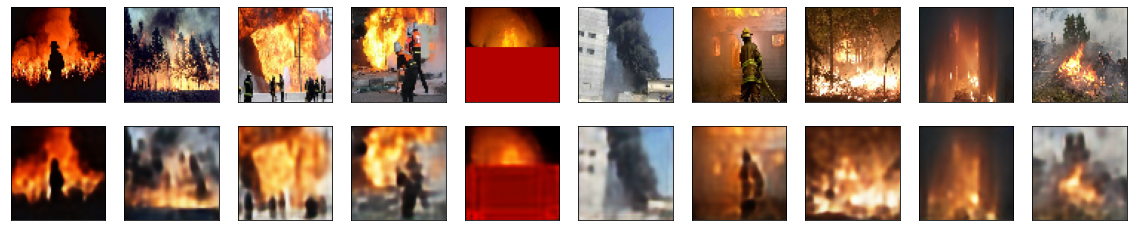

Class  6


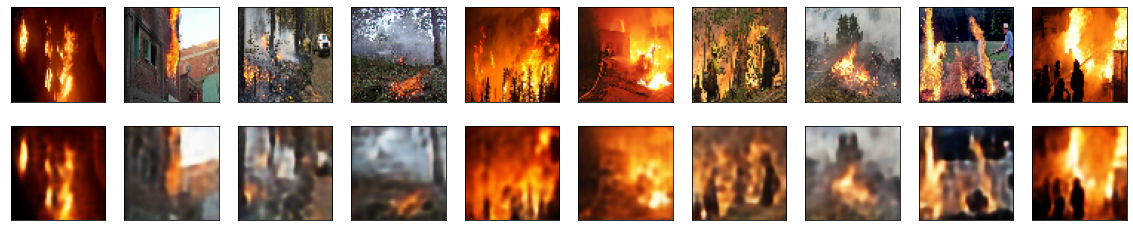

Class  7


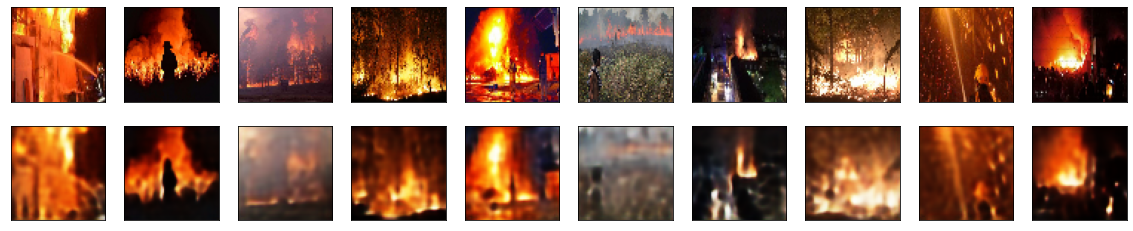

Class  8


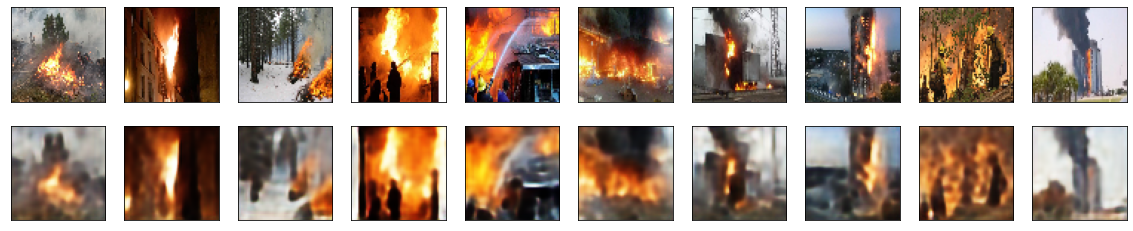

Class  9


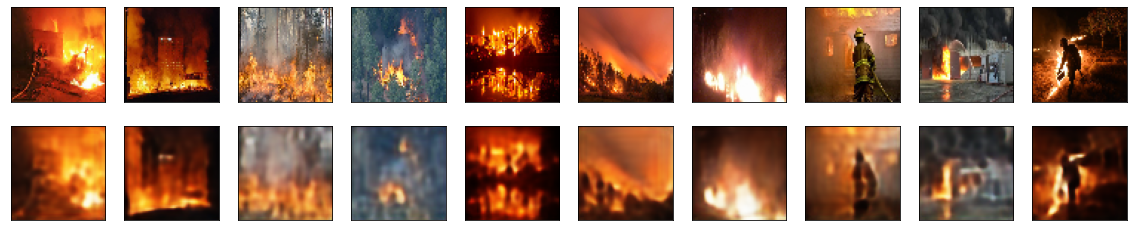

In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import random
#an attempt to reduce the dimensions so that k-means clustering can work better
layer_name = 'encoded_layer'
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(layer_name).output)
decoded_imgs = autoencoder.predict(X_test)

pred = encoder.predict(X_test)
print(pred.shape)
pca = PCA(n_components=6)
pred.resize(10000,50)
principalComponents = pca.fit_transform(pred)
kmeans=KMeans(n_clusters=10,init='k-means++',max_iter=1000)
clustered_images = kmeans.fit_predict(principalComponents)
copy=clustered_images
for i in range(10):
    n = 10
    count = 0 
    print("Class ",i)
    indices = np.array(np.where(copy==i))
    plt.figure(figsize=(20, 4))
    for j in range(n):
      # display original
        pos = random.randint(0,243)
        ax = plt.subplot(2, n,j + 1)
        plt.imshow(X_test[pos].reshape(64,64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

      # display reconstruction
        ax = plt.subplot(2, n, j + 1 + n)
        plt.imshow(decoded_imgs[pos].reshape(64,64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        count+=1
    plt.show()

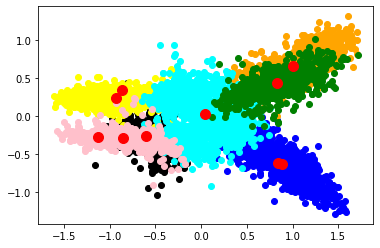

In [10]:
# Plot the clusters

import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = principalComponents[clustered_images == 0]
filtered_label1 = principalComponents[clustered_images == 1]
filtered_label2 = principalComponents[clustered_images == 2]
filtered_label3 = principalComponents[clustered_images == 3]
filtered_label4 = principalComponents[clustered_images == 4]
filtered_label5 = principalComponents[clustered_images == 5]
filtered_label6 = principalComponents[clustered_images == 6]


#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'blue')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'yellow')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'orange')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'cyan')
plt.scatter(filtered_label5[:,0] , filtered_label5[:,1] , color = 'green')
plt.scatter(filtered_label6[:,0] , filtered_label6[:,1] , color = 'pink')

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=100,                             # Set centroid size
            c='red')                           # Set centroid color


#Plotting the results


plt.show()